# Predicting MPG with OLS

**Author:** Richard Hemphill<br>
**ID:** 903877709<br>
**Class:** ECE5268 Theory of Neural Networks<br>
**Instructor:** Dr. Georgios C. Anagnostopoulos<br>
**Description:** Utilize characteristics from various cars to predict miles-per-gallon fuel consumption.  The prediction equation is determined using Ordinary Least Squares regression.

In [360]:
# CONSTANTS
DATASET_FILE = 'autompg_dataset.csv'
NUMBER_FOR_TRAINING = 200
NUMBER_FOR_VALIDATION = 100

In [361]:
# LIBRARIES
import numpy as np                  # matrix manipulation
import random                       # shuffle data
import matplotlib.pyplot as plt     # surface plot

In [362]:
# FUNCTIONS
# Create Augmented Design Matrix
def AugmentedDesignMatrix(dataSet, features):
    # Create the design matrix.
    adm = dataSet[features[0]]
    for feature in features[1:]:
        adm = np.column_stack((adm,dataSet[feature]))
     # Augment the design matrix to accomodate the bias term.
    adm = np.column_stack((adm,np.ones(len(adm))))
    return adm

In [363]:
# Calculate Mean Squared Error
def MSE(actual, predicted):
    return np.square(np.subtract(actual, predicted)).mean()

In [364]:
def PredictionEquation(y, xs, w):
    eq = '{} = '.format(y)
    wfmat = lambda i: ('+' if i > 0 else '') + '{:0.6}'.format(i)
    for idx, x in enumerate(xs):
        eq = eq + '{}*{}'.format(wfmat(w[idx]), x)
    eq = eq + wfmat(w[-1])
    return eq

In [365]:
# Load data file
csvFile = open(DATASET_FILE, 'r')
dataSet = np.genfromtxt(csvFile, delimiter=',', names=True, case_sensitive=True)
csvFile.close()

In [366]:
# shuffle data randomly so that training will not use same sets every time.
random.shuffle(dataSet)

In [367]:
# Split the data set into groups for training, validation and test.
trainData = dataSet[:NUMBER_FOR_TRAINING]
valData = dataSet[NUMBER_FOR_TRAINING+1:NUMBER_FOR_TRAINING+NUMBER_FOR_VALIDATION]
testData = dataSet[NUMBER_FOR_TRAINING+NUMBER_FOR_VALIDATION+1:]

In [368]:
# Specify the output feature
OUTPUT_FEATURE='mpg'

In [369]:
# Create the output vector
Y = trainData[OUTPUT_FEATURE]

## Part (a): Model 1 Regression
Use OLS regression on the training data to predict _mpg_ based on _horsepower_ and _weight_.

In [370]:
# Specify the input features to be used.
inputFeatures1=['horsepower', 'weight']

In [371]:
# Create the augmented the design matrix
X1 = AugmentedDesignMatrix(dataSet=trainData,features=inputFeatures1)

In [372]:
# Create the augmented model parameter vector.
W1 = np.ones(len(inputFeatures1)+1)

In [373]:
# Calculate the augmented model parameter vector using OLS
R = np.dot(X1.T, X1)
Rinv = np.linalg.inv(R)
W1 = np.dot(np.dot(Rinv, X1.T), Y)

### i Prediction Equation

In [374]:
print(PredictionEquation(y=OUTPUT_FEATURE, xs=inputFeatures1, w=W1))

mpg = -0.0111846*horsepower-0.00493702*weight+36.1071


### ii Optimal Training MSE

In [375]:
print('Training MSE (Model 1): {:,.6}'.format(MSE(Y,np.dot(X1,W1))))

Training MSE (Model 1): 4.92204


### Observation
The predition equation makes sense.  Effenent cars have an _mpg_ in the 30's (bias).  Sports cars (high _horsepower_) are not as gas efficient.  The heavier the car (_weight_), the more fuel energy it needs to move.

## Part (b): Fitted Model 1 Plot

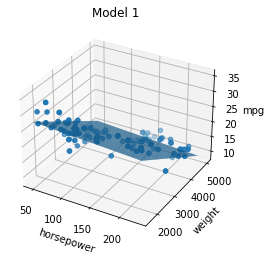

In [376]:
# Create figure object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Limit plot range
NUM_STEPS=100

# Process x-axis points
Xmin = min(trainData[inputFeatures1[0]])
Xmax = max(trainData[inputFeatures1[0]])
Xstep = (Xmax-Xmin)/NUM_STEPS
x = np.arange(Xmin, Xmax, Xstep)

# Process y-axis points
Ymin = min(trainData[inputFeatures1[1]])
Ymax = max(trainData[inputFeatures1[1]])
Ystep = (Ymax-Ymin)/NUM_STEPS
y = np.arange(Ymin, Ymax, Ystep)

# Create a grid of points
Xpoints, Ypoints = np.meshgrid(x, y)

# Set the z-axis points
zs = np.array(W1[0]*Xpoints + W1[1]*Ypoints + W1[2])
Zpoints = zs.reshape(Xpoints.shape)

# Plot the predicted surface
ax.plot_surface(Xpoints, Ypoints, Zpoints)

# Add scatter plot of the training data
ax.scatter(trainData[inputFeatures1[0]], trainData[inputFeatures1[1]], trainData[OUTPUT_FEATURE])

# Label the plot
ax.set_xlabel(inputFeatures1[0])
ax.set_ylabel(inputFeatures1[1])
ax.set_zlabel(OUTPUT_FEATURE)
plt.title('Model 1')
plt.show()

### Observation
The surface plot aligns well with the training data.  It crosses the middle of the _mpg_ values for the various training points.

## Part (c): Model 2 Regression
Use OLS regression on the training data to predict _mpg_ based on _horsepower_, _weight_, _cylinders_, _displacement_, and _acceleration_.

In [377]:
# Specify the input features to be used.
inputFeatures2=['horsepower', 'weight', 'cylinders', 'displacement', 'acceleration']

In [378]:
# Create the augmented the design matrix
X2 = AugmentedDesignMatrix(dataSet=trainData,features=inputFeatures2)

In [379]:
# Create the augmented model parameter vector.
W2 = np.ones(len(inputFeatures2)+1)

In [380]:
# Calculate the augmented model parameter vector using OLS
R = np.dot(X2.T, X2)
Rinv = np.linalg.inv(R)
W2 = np.dot(np.dot(Rinv, X2.T), Y)

### i Prediction Equation

In [381]:
print(PredictionEquation(y=OUTPUT_FEATURE, xs=inputFeatures2, w=W2))

mpg = -0.0148466*horsepower-0.00362648*weight-0.681694*cylinders-0.00280274*displacement-0.209681*acceleration+40.2098


### ii Optimal Training MSE

In [383]:
print('Training MSE (Model 2): {:,.6}'.format(MSE(Y,np.dot(X2,W2))))

Training MSE (Model 2): 4.57232


### Observation
